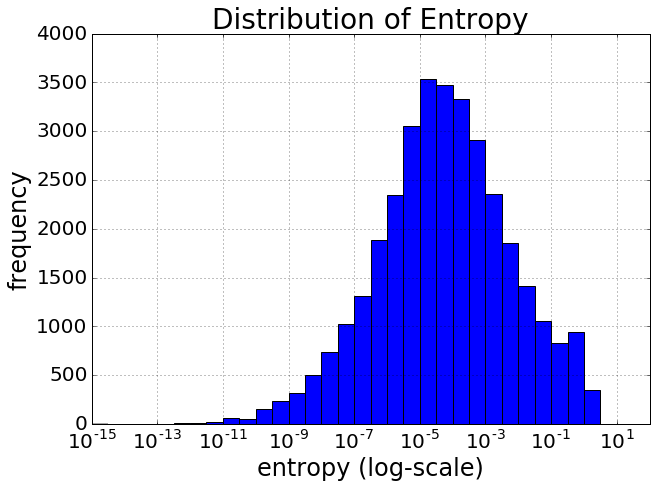

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

filename="./entropy_list.csv"

entropies = []
with open(filename, 'r') as fh_data:
    for line in fh_data:
        cols = line.split(",")
        entropies.append(float(cols[2]))

fig = plt.figure(figsize=(10,7))
plt.hist(entropies, bins = [10.0**e for e in np.arange(-15,2, 0.5)])
plt.xscale('log')
plt.title("Distribution of Entropy", fontsize=28)
plt.tick_params(labelsize=20)
plt.xlabel("entropy (log-scale)", fontsize=24)
#plt.xticks(range(-16,2,4),[str(10**e) for e in range(-16,2,4)])
plt.ylabel("frequency", fontsize=24)
plt.grid()
#plt.savefig("distribution_of_entropy.png")
plt.show()

In [8]:
import random
from PIL import Image
import matplotlib.pyplot as plt
import os
import math

filename="./entropy_list.csv"
data = []
imageNum = 10

os.system("rm ./sample_images/*.png")

with open(filename, 'r') as fh_data:
    for line in fh_data:
        cols = line.split(",")
        if 10.0**(-3.0) < float(cols[2]) < 10.0**(-2.0):
            name = cols[0]
            h = float(cols[2])
            prob = [float(cols[idx]) for idx in range(3, len(cols))]
            data.append([name, h, prob])

print(len(data))
indeces = random.sample(range(len(data)), imageNum)
print(indeces)
#fig = plt.figure(figsize=(21,30))
for i in range(0, imageNum):
    # 画像取得
    name = data[indeces[i]][0]
    os.system("cp ./generated_data/"+name+".png ./sample_images/"+name+"_"+str(math.floor(float(name)/169.0)%10)+".png")
    #name = data[indeces[i]][0]
    #im = Image.open("./generated_data/"+name+".png")
    #im_array = np.asarray(im)
    #plt.subplot(imageNum//2, 4, 2*i+1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.imshow(im_array, interpolation="none")
    
    # 確率の表示
    prob = data[indeces[i]][2]
    fig = plt.figure(figsize=(8,4))
    plt.bar(range(10),prob, align="center", log=True)
    plt.tick_params(labelsize=24)
    plt.xticks(range(10), [str(a) for a in range(10)])
    plt.xlim(-1, 10)
    plt.ylim(1.0e-7, 1.0)
    plt.grid
    plt.savefig("./sample_images/"+name+"_prob.png")
    plt.clf()
    fig.clear()

#plt.savefig("graphs_10_00.png")
#plt.show()

4211
[476, 3190, 2919, 85, 1558, 3542, 274, 1878, 526, 2357]
